#Classification of ECG for normal and abnormal beats using CNN

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
test=pd.read_csv("drive/My Drive/DataSet/mitbih_test.csv",header=None) 
train=pd.read_csv("drive/My Drive/mitbih_train.csv",header=None) 

In [4]:
print("Type\tCount")
print((train[187]).value_counts())

print("train shape : ",train.shape)
print("test shape : ",test.shape)

Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
train shape :  (87554, 188)
test shape :  (21892, 188)


###Processing data

In [5]:
# making multiclass to binary class new labels_train containing either 0 or 1 

label_train=[] 
for i in train.iloc[:,187] :
    if i not in  [0.0]:
        label_train.append(1)
        #print("value is",i)
    else:
        label_train.append(0)
        #print("value",i)

In [6]:
# making multiclass to binary class.now labels_test containing either 0 or 1 

label_test=[]  
for i in test.iloc[:,187]:
    if i not in  [0.0]:
        label_test.append(1)
        #print("value is",i)
    else:
        label_test.append(0)
        #print("value",i)

In [7]:
#create new df 
labels_train = pd.DataFrame({'col':label_train})
#print (labels_train)

labels_test = pd.DataFrame({'col':label_test})
#print (labels_test)

In [8]:
label_train=np.asarray(label_train)

label_test=np.asarray(label_test)

train[187] = labels_train    # replace labels column with binary labels
test[187] =  labels_test

In [9]:
print('Count of all classes in training dataset')
print("Type\tCount")
print((train[187]).value_counts())

print('*************************************')

print('Count of all classes in test dataset')
print("Type\tCount")
print((test[187]).value_counts())

Count of all classes in training dataset
Type	Count
0    72471
1    15083
Name: 187, dtype: int64
*************************************
Count of all classes in test dataset
Type	Count
0    18118
1     3774
Name: 187, dtype: int64


In [10]:
train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,0.052632,0.140351,0.119298,0.091228,0.140351,0.161404,0.105263,0.143860,0.143860,0.129825,0.147368,0.157895,0.164912,0.168421,0.154386,0.175439,0.164912,0.154386,0.182456,0.192982,0.196491,0.207018,0.217544,0.217544,0.256140,0.284211,0.294737,0.301754,0.301754,0.322807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,0.078333,0.183333,0.275000,0.315000,0.361667,0.430000,0.481667,0.526667,0.543333,0.563333,0.581667,0.588333,0.600000,0.603333,0.613333,0.621667,0.636667,

In [11]:
dt = np.array(train)
dt_test=np.array(test)

No handles with labels found to put in legend.


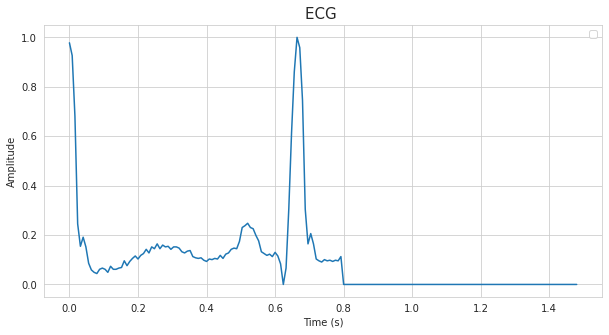

In [12]:
import seaborn as sb
import scipy as sc
import matplotlib.pyplot as plt
sb.set_style("whitegrid")
x = np.arange(0, 186)*0.008 # In the experiment, only ECG lead II, MI and healthy samples were used. And in the experiment, the re-sampling frequency is 125 Hz. That is 0.008s. A signal contains 187 values, which is about 1.5s.
plt.figure(figsize=(10,5))
plt.plot(x, dt[0,:186] ) # data should  be array !

plt.legend()
plt.title("ECG ", fontsize=15)
plt.ylabel("Amplitude", fontsize=10)
plt.xlabel("Time (s)", fontsize=10)
plt.show()

In [13]:
def detect_peaks(data): # data should be array 
    pos=0
    pospeak=[]

    for i in data:
        pos=pos+1
        if i > 0.9 and i < 1:
            pospeak.append(pos)
            #print("peak")
    return ( pospeak)

In [14]:
def calc_bpm(x,pospeak):
    i=len(pospeak)-1
    carreau = x[pospeak[i]]/0.04
    bpm = 1500 / carreau
    return bpm
# This formula from: https://litfl.com/ecg-rate-interpretation/

In [15]:
#add column to my data 
train[188]=1
test[188]=1

###Make train set classified by heart rates

In [16]:
bpmcoeur=[]
i=0
for e in dt:# extract row by row in my data 
    x = np.arange(0, 188)*0.008
    pospeak=[]
    pospeak=detect_peaks(e)
    #print(pospeak)
    if not pospeak :
        train[188][i]=0
        i=i+1
    else:
        b=calc_bpm(x,pospeak)
        train[188][i]=float(b)
        i=i+1
        bpmcoeur.append(b)
#print(bpmcoeur)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [17]:
"""
Normal: 60–100 beats/min + signal normal                    ->  classe 0
Anormal : Heart rates <60 or > 100 + "S" , "V" , "Q" or "F" -> classe 1
"""
data = train
for i in range(len(data)):
    if data[187][i] == 0 :
        # all signaux normal
        if data[188][i] >= 60 and data[188][i] <= 100 :
            data[188][i]=0 # sig have normal heart rates 
        elif data[188][i] < 60 or data[188][i] > 100:
            data[187][i]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [18]:
train[187].value_counts() # 0 : signal normal , 1 : signal abnormal

1    56725
0    30829
Name: 187, dtype: int64

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(data.drop([187], axis=1), data[187], test_size = 0.1)

In [20]:
xtrain = np.array(xtrain).reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest = np.array(xtest).reshape(xtest.shape[0], xtest.shape[1], 1)

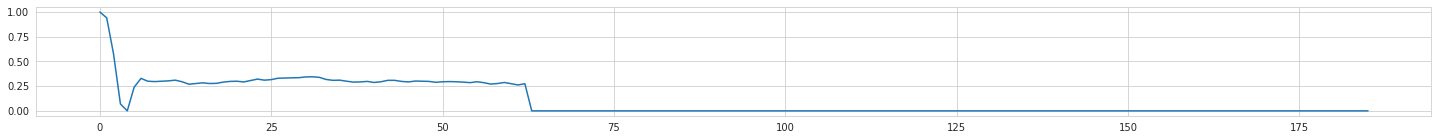

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(25,2))
ax.plot(data[data[187]==float(1)].sample(1).iloc[0,:186])

#Model CNN

In [22]:
neu = Sequential()

neu.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (xtrain.shape[1],1)))
neu.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu')) 
neu.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation='relu'))    

neu.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
neu.add(Dropout(0.5))

neu.add(Flatten())

neu.add(Dense(units = 512, activation='relu'))
neu.add(Dense(units = 1024, activation='relu'))
neu.add(Dense(units = 5, activation='softmax'))

neu.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
his = neu.fit(xtrain, ytrain, epochs = 10)

Epoch 1/10
2463/2463 [==============================] - 322s 130ms/step - loss: 0.1336 - accuracy: 0.9480
Epoch 2/10
2463/2463 [==============================] - 308s 125ms/step - loss: 0.0625 - accuracy: 0.9787
Epoch 3/10
2463/2463 [==============================] - 323s 131ms/step - loss: 0.0526 - accuracy: 0.9823
Epoch 4/10
2463/2463 [==============================] - 322s 131ms/step - loss: 0.0456 - accuracy: 0.9840
Epoch 5/10
2463/2463 [==============================] - 317s 129ms/step - loss: 0.0401 - accuracy: 0.9862
Epoch 6/10
2463/2463 [==============================] - 313s 127ms/step - loss: 0.0390 - accuracy: 0.9867
Epoch 7/10
2463/2463 [==============================] - 309s 125ms/step - loss: 0.0360 - accuracy: 0.9874
Epoch 8/10
2463/2463 [==============================] - 301s 122ms/step - loss: 0.0359 - accuracy: 0.9877
Epoch 9/10
2463/2463 [==============================] - 308s 125ms/step - loss: 0.0336 - accuracy: 0.9880
Epoch 10/10
2463/2463 [=======================

In [24]:
ypred_train = neu.predict(xtest)

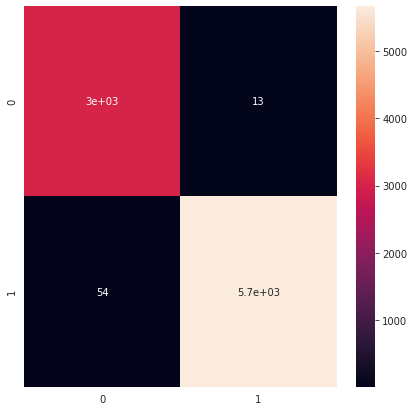

In [25]:
y_lbl = [np.where(i == np.max(i))[0][0] for i in ypred_train]
mat = confusion_matrix(ytest, y_lbl)
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(mat, annot = True)

In [26]:
print("Accuracy score of the predictions: {0}".format(accuracy_score(y_lbl, ytest)))

Accuracy score of the predictions: 0.9923481041571494


###Make test set classified by heart rates

In [27]:
bpmcoeur_test=[]
i=0
for e in dt_test:# extract row by row in our data 
    x = np.arange(0, 188)*0.008
    pospeak=[]
    pospeak=detect_peaks(e)
    #print(pospeak)
    if not pospeak :
        test[188][i]=0
        i=i+1
    else:
        b=calc_bpm(x,pospeak)
        test[188][i]=float(b)
        i=i+1
        bpmcoeur_test.append(b)
#print(bpmcoeur_test) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [28]:
data_test = test
for i in range(len(data_test)):
    if data_test[187][i] == 0 :
        # all signaux normal
        if data_test[188][i] >= 60 and data_test[188][i] <= 100 :
            data_test[188][i]=0 # sig have normal heart rates 
        elif data_test[188][i] < 60 or data_test[188][i] > 100:
            data_test[187][i]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
test[187].value_counts()

1    14138
0     7754
Name: 187, dtype: int64

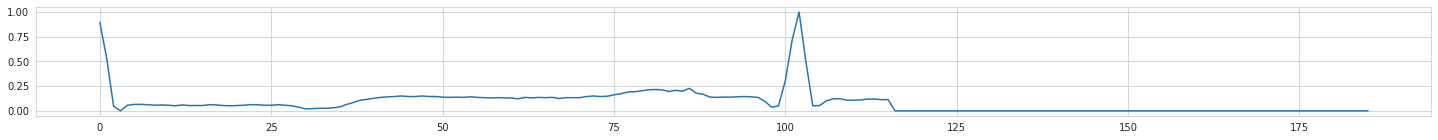

In [30]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(25,2))
ax.plot(test[test[187]==float(1)].sample(1).iloc[0,:186])

In [31]:
xtest = test.drop([187], axis=1) 
ytest = test[187]

xtest = np.array(xtest).reshape(xtest.shape[0], xtest.shape[1], 1)

In [32]:
ytest_pred = neu.predict(xtest)

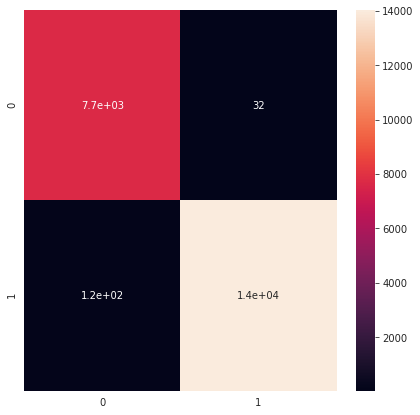

In [33]:
ytest_lbl = [np.where(i == np.max(i))[0][0] for i in ytest_pred]
mat = confusion_matrix(ytest, ytest_lbl)
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(mat, annot = True)

In [34]:
print("Accuracy score of the predictions: {0}".format(accuracy_score(ytest_lbl, ytest)))

Accuracy score of the predictions: 0.9931481819842864
